In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
class Node:
    def __init__(self, val, lc = None, rc = None):
        self.val = val
        self.lc = lc
        self.rc = rc
        
class point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def __repr__(self):
        return f'({self.x},{self.y})'
        
def insert(root, new):
    if root is None:
        return Node(new)
    elif less_line(new, root.val):
        root.lc = insert(root.lc, new)
    else:
        root.rc = insert(root.rc, new)
    return root

def inorder(root):
    result = [] 
    if root:
        result.extend(inorder(root.lc))
        result.append(root.val)
        result.extend(inorder(root.rc))
    return result

def preorder(root):
    result = [] 
    if root:
        result.append((root.val))
        result.extend(inorder(root.lc))
        result.extend(inorder(root.rc))
    return result

def depth(root):
    if root is None:
        return 0
    return max(depth(root.lc), depth(root.rc)) + 1

def is_balanced(root):
    if root is None:
        return True
    left = depth(root.lc)
    right = depth(root.rc)
    if abs(left - right) < 2 and is_balanced(root.lc) and is_balanced(root.rc):
        return True
    return False

def BBT(x):
    if  not x.any():
        return None
    mid = len(x) >> 1
    newRoot = Node(x[mid])
    newRoot.lc = BBT(x[:mid])
    newRoot.rc = BBT(x[mid+1:])
    return newRoot

def less_line(p0, p1):
    if p0.y > p1.y:
        return True
    elif p0.y == p1.y and p0.x < p1.x:
        return True
    else:
        return False

In [4]:
x = np.random.rand(10,2)
x = x[np.lexsort([x[:,0],-x[:,1]])]

ini = [x]

r = BBT(x)
inorder(r)

[array([0.9707929 , 0.97159145]),
 array([0.32607129, 0.85331989]),
 array([0.75777806, 0.84849911]),
 array([0.22615491, 0.63978887]),
 array([0.70358391, 0.5896554 ]),
 array([0.86733136, 0.54509767]),
 array([0.46607322, 0.46377524]),
 array([0.02439529, 0.34593736]),
 array([0.16969769, 0.1383207 ]),
 array([0.30177373, 0.01441812])]

In [5]:
def to_segments(x):
    mid = len(x) >> 1
    ini = x[:mid]
    fin = x[mid:]
    return ini, fin

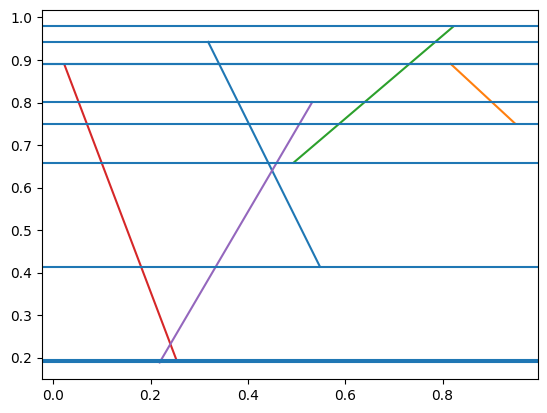

In [6]:
x = np.random.rand(10,2)
ini, fin = to_segments(x)
for i in range(len(ini)):
    plt.plot([ini[i,0], fin[i,0]], [ini[i,1], fin[i,1]])
    
x_ord = x[np.lexsort([x[:,0],-x[:,1]])]
for i in x_ord[:,1]:
    plt.axhline(i)

In [53]:
class sweeper:
    def __init__(self, x):
        x_ord = x[np.lexsort([x[:,0],-x[:,1]])]
        self.events = x_ord[:,1]
        self.ini, self.fin = self.to_segments(x)
        self.pre = []
        self.curr = []
        self.line = None
    
    def to_segments(self,x):
        mid = len(x) >> 1
        ini = x[:mid]
        fin = x[mid:]
        return ini, fin
    
    def next(self):
        self.line = self.events[0]
        self.events = self.events[1:]
        self.pre = self.curr
        if self.line in self.ini[:,1]:
            self.curr = np.append(self.curr, int(np.where(self.ini[:,1] == self.line)[0]))
            self.curr = self.vibing()            
        else:
            self.curr = np.append(self.curr, int(np.where(self.fin[:,1] == self.line)[0]))
            self.curr = self.vibing()
            self.curr = self.curr[:len(self.curr) -1 ]
            
    def vibing(self):
        aux = {}
        if self.line in self.ini[:,1]:
            nuevo_i = int(np.where(self.ini[:,1] == self.line)[0])
            aux[ini[nuevo_i,0]] = nuevo_i
        else:
            nuevo_i = int(np.where(self.fin[:,1] == self.line)[0])
            aux[fin[nuevo_i,0]] = nuevo_i
        for i in self.curr:
            if i != nuevo_i:
                alfa = (self.line - self.fin[i,1])/(self.ini[i,1] - self.fin[i,1])
                aux[alfa*ini[i,0]+(1-alfa)*fin[i,0]] = i
        aux = dict(sorted(aux.items()))
        return np.array(list(aux.values()))
        
    def check(self)
    
    def sweep(self):
        while len(self.events) > 1:
            linea.next()
    
    def plot(self):
        for i in range(len(self.ini)):
            plt.plot([self.ini[i,0], self.fin[i,0]], [self.ini[i,1], self.fin[i,1]])
        if self.line:
            plt.axhline(self.line)
            
        

[[0.39130464 0.64859485]
 [0.45593739 0.48690748]
 [0.07166168 0.62057089]
 [0.63230269 0.82843571]
 [0.43327273 0.34019539]
 [0.80140695 0.56584212]
 [0.46865612 0.96256533]
 [0.57291668 0.85241634]
 [0.48895942 0.29665456]
 [0.75949865 0.32694375]]


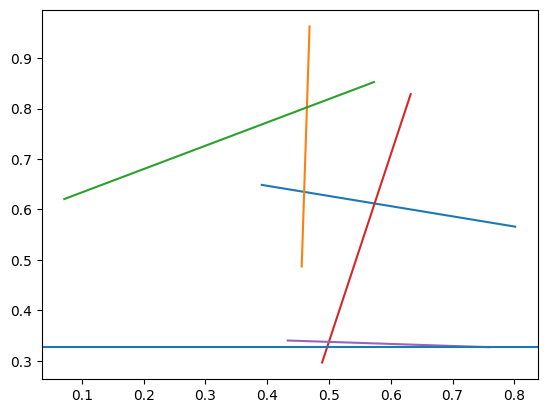

In [54]:
x = np.random.rand(10,2)
print(x)
linea = sweeper(x)
linea.sweep()
linea.plot()

In [ ]:
np where